In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

In [3]:
pd.set_option("Display.max_columns", None)
pd.set_option("Display.max_rows", None)
pd.set_option("Display.float_format", lambda x: '%3.f' % x)

In [4]:
file = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [5]:
print('Head'.center(70,"~"))
print(file.head())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Head~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6      148             72             35        0   34   
1            1       85             66             29        0   27   
2            8      183             64              0        0   23   
3            1       89             66             23       94   28   
4            0      137             40             35      168   43   

   DiabetesPedigreeFunction  Age  Outcome  
0                         1   50        1  
1                         0   31        0  
2                         1   32        1  
3                         0   21        0  
4                         2   33        1  


In [6]:
print('Data types'.center(70,"~"))
print(file.describe())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Data types~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
count          768      768            768            768      768  768   
mean             4      121             69             21       80   32   
std              3       32             19             16      115    8   
min              0        0              0              0        0    0   
25%              1       99             62              0        0   27   
50%              3      117             72             23       30   32   
75%              6      140             80             32      127   37   
max             17      199            122             99      846   67   

       DiabetesPedigreeFunction  Age  Outcome  
count                       768  768      768  
mean                          0   33        0  
std                           0   12        0  
min                           0   21        0  
25%          

In [7]:
print("Missing values".center(70,"~"))
file[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=file[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.NaN)
print(file.isna().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~Missing values~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


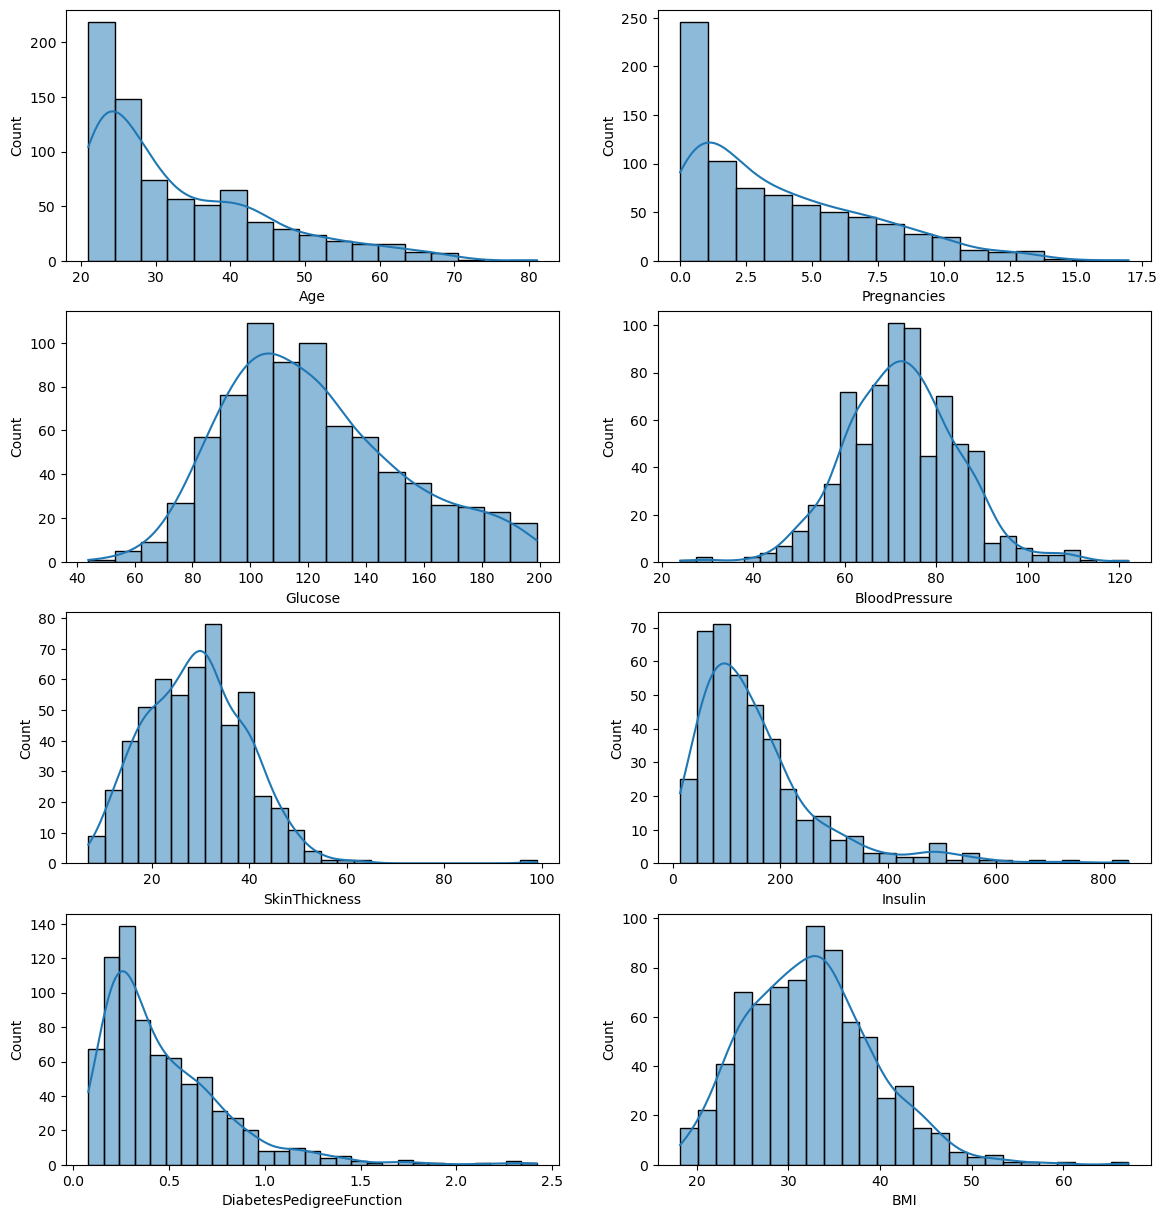

In [8]:
fig, ax = plt.subplots( 4, 2, figsize=(14,15))
sns.histplot(file.Age,kde=True,ax=ax[0,0])
sns.histplot(file.Pregnancies,kde=True,  ax=ax[0,1])
sns.histplot(file.Glucose,kde=True,  ax=ax[1,0])
sns.histplot(file.BloodPressure,kde=True,  ax=ax[1,1])
sns.histplot(file.SkinThickness,kde=True,  ax=ax[2,0])
sns.histplot(file.Insulin,kde=True,  ax=ax[2,1])
sns.histplot(file.DiabetesPedigreeFunction,kde=True, ax=ax[3,0])
sns.histplot(file.BMI,kde=True, ax=ax[3,1])
plt.show()

In [9]:
file['Glucose'].fillna(file['Glucose'].mean(), inplace=True)
file['BloodPressure'].fillna(file['BloodPressure'].mean(), inplace=True)
file['SkinThickness'].fillna(file['SkinThickness'].mean(), inplace=True)
file['Insulin'].fillna(file['Insulin'].mean(), inplace=True)
file['BMI'].fillna(file['BMI'].mean(), inplace=True)

In [10]:
print("MEDIA AGRUPADO POR RESULTADO".center(70,"~"))
print(file.groupby(['Outcome']).mean())

~~~~~~~~~~~~~~~~~~~~~MEDIA AGRUPADO POR RESULTADO~~~~~~~~~~~~~~~~~~~~~
         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                  3      111             71             28      142   31   
1                  5      142             75             32      180   35   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                               0   31  
1                               1   37  


~~~~~~~~~~~~~~~~~~~~~~~correlaçao de variaveis~~~~~~~~~~~~~~~~~~~~~~~~


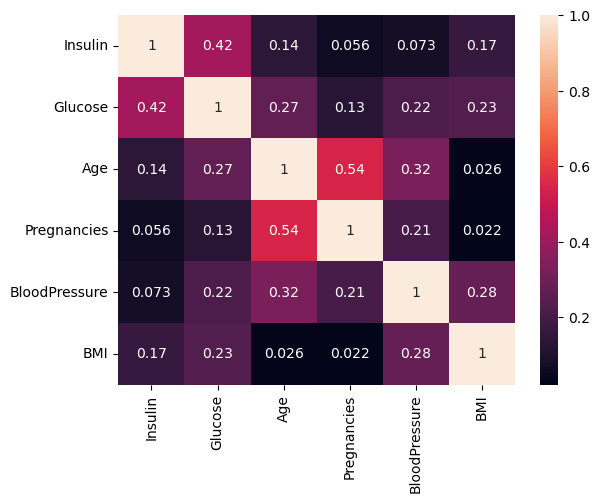

In [11]:
print("correlaçao de variaveis".center(70,"~"))
file_cor = file[['Insulin','Glucose','Age','Pregnancies','BloodPressure','BMI']].dropna().corr()
sns.heatmap(file_cor, annot=True)
plt.show()

In [12]:
print("Inferência estatística".center(70,"~"))
positive_df=file[file['Outcome']==1]
negative_df=file[file['Outcome']==0]

preg_0=positive_df[positive_df['Pregnancies']==0]
preg_1=positive_df[positive_df['Pregnancies']==1]
preg_2=positive_df[positive_df['Pregnancies']==2]
preg_3=positive_df[positive_df['Pregnancies']==3]
preg_4=positive_df[positive_df['Pregnancies']==4]
preg_5=positive_df[positive_df['Pregnancies']==5]
preg_6=positive_df[positive_df['Pregnancies']==6]
preg_7=positive_df[positive_df['Pregnancies']==7]
preg_8=positive_df[positive_df['Pregnancies']==8]
preg_9=positive_df[positive_df['Pregnancies']==9]
preg_10=positive_df[positive_df['Pregnancies']==10]
preg_11=positive_df[positive_df['Pregnancies']==11]
preg_12=positive_df[positive_df['Pregnancies']==12]
preg_13=positive_df[positive_df['Pregnancies']==13]
preg_14=positive_df[positive_df['Pregnancies']==14]
preg_15=positive_df[positive_df['Pregnancies']==15]
preg_16=positive_df[positive_df['Pregnancies']==16]
preg_17=positive_df[positive_df['Pregnancies']==17]

for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['Glucose']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(st.shapiro(p))
        break

~~~~~~~~~~~~~~~~~~~~~~~~Inferência estatística~~~~~~~~~~~~~~~~~~~~~~~~
ShapiroResult(statistic=0.9203853607177734, pvalue=0.040333446115255356)


In [13]:
print(st.kruskal(preg_0['Glucose'],preg_1['Glucose'],preg_2['Glucose'],preg_3['Glucose'],preg_4['Glucose'],preg_5['Glucose'],preg_6['Glucose'],preg_7['Glucose'],preg_8['Glucose'],preg_9['Glucose'],preg_10['Glucose'],preg_11['Glucose'],preg_12['Glucose'],preg_13['Glucose'],preg_14['Glucose'],preg_15['Glucose'],preg_17['Glucose']))


KruskalResult(statistic=12.994415472171449, pvalue=0.6731660605552291)


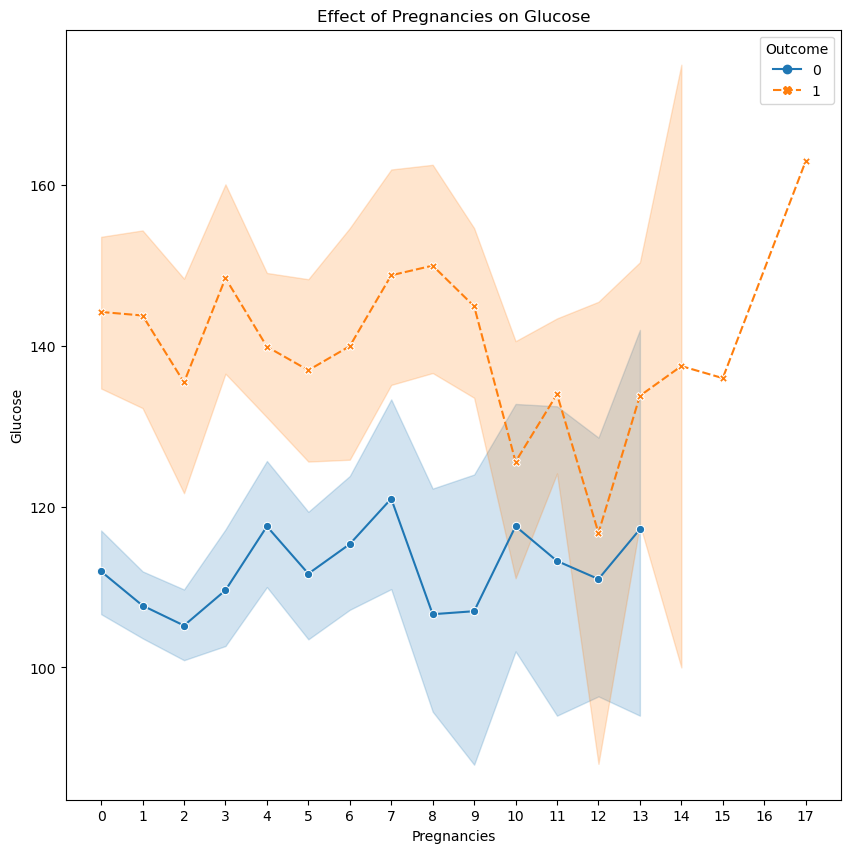

In [14]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='Glucose',data=file,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Glucose')
plt.show()